In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Define the target distribution parameters
mu_target = np.array([1, 2])
Sigma_target = np.array([[1, 0.9], [0.9, 1]])

# Define the proposal distribution parameters
mu_proposal = np.array([1, 2])
D = np.array([[2, 0], [0, 2]])

In [3]:
# Define the target distribution parameters Q1
mu = np.array([1, 2])
cov_matrix = np.array([[1, 0.9], [0.9, 1]])
target_distribution = multivariate_normal(mean=mu, cov=cov_matrix)

In [4]:
# Define the dominating function constant
C = 0.9
acceptance_count = 0
num_samp = 10000

In [5]:
# Define the target and proposal distributions
target_distribution = multivariate_normal(mu_target, Sigma_target)
proposal_distribution = multivariate_normal(mu_proposal, D)


In [23]:
def rej_samp(num_samples):
    # Initialize arrays to store samples and acceptance counts
    samples = []
    acceptance_count = 0
    # Run the Rejection Sampler
    for _ in range(num_samples):
        # Draw a sample from the proposal distribution
        x = proposal_distribution.rvs()
        
        # Calculate the acceptance probability
        acceptance_prob = target_distribution.pdf(x) / (C * proposal_distribution.pdf(x))
        
        # Accept or reject the sample
        if np.random.rand() < acceptance_prob:
            samples.append(x)
            acceptance_count += 1
    # Calculate the acceptance rate
    acceptance_rate = acceptance_count / num_samples
    print(f'Mean acceptance rate: {acceptance_rate:.4f}')
    return samples

In [20]:
# Calculate the threshold value for the 95% level set
threshold = target_distribution.pdf(0.95)
# Create a grid of points
x1, x2 = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100))
pdf_values = target_distribution.pdf(np.dstack((x1, x2)))

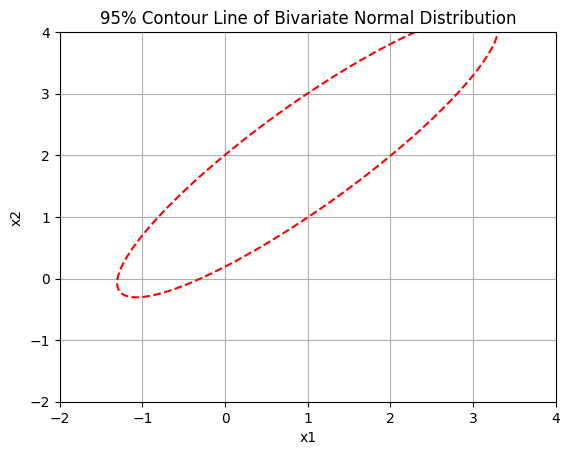

In [21]:
# Plot the contour line
plt.contour(x1, x2, pdf_values, levels=[threshold], colors='red', linestyles='dashed')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('95% Contour Line of Bivariate Normal Distribution')
plt.grid(True)
plt.show()

In [22]:
# convert samples list to a NumPy array for plotting
samples = np.array(rej_samp(num_samp))

0.3931


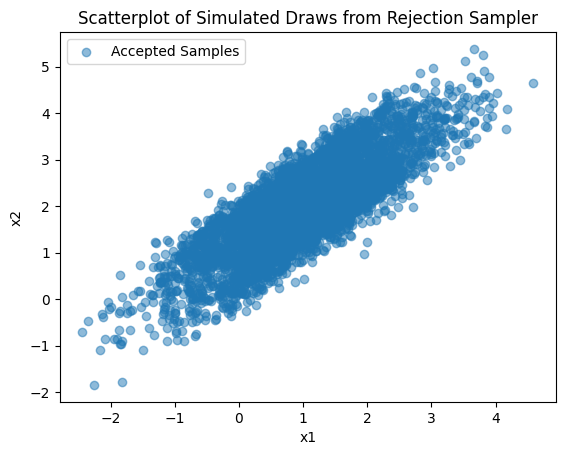

Mean acceptance rate: 0.3958


In [18]:
# Plot the scatterplot of the accepted samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Accepted Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Scatterplot of Simulated Draws from Rejection Sampler')
plt.show()